In [45]:
## Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
warnings.filterwarnings('ignore')

In [46]:
airbnb = pd.read_csv('listings.csv') 
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 300)

In [47]:
airbnb.shape#melihat banyak row dan  kolom

(3585, 95)

In [48]:
airbnb.duplicated().sum() #yang duplikat di jadiin satu lalu di jumlah
airbnb.drop_duplicates(inplace=True)

In [49]:
airbnb.isna().sum().sort_values(ascending=False)

has_availability                    3585
license                             3585
neighbourhood_group_cleansed        3585
jurisdiction_names                  3585
square_feet                         3529
monthly_price                       2697
weekly_price                        2693
security_deposit                    2243
notes                               1975
interaction                         1554
access                              1489
neighborhood_overview               1415
host_about                          1309
transit                             1290
house_rules                         1192
cleaning_fee                        1107
space                               1057
review_scores_accuracy               823
review_scores_location               822
review_scores_value                  821
review_scores_checkin                820
review_scores_communication          818
review_scores_cleanliness            818
review_scores_rating                 813
reviews_per_mont

# Features Use 

neighbourhood__cleansed : lokasi listing tersebut berada/ distrik. 

property_type : tipe properti dari listing. exp: House/ Apartment/ ...

room_type: tipe ruangan dari listing (Entire home/apt, Private room, or Shared room).

accommodates : jumlah orang yang listing dapat akomodasikan.

bathrooms: jumlah bathrooms

bedrooms: jumlah bedrooms

beds: jumlah tempat tidur

amenities : perlengkapan yang ditawarkan host untuk pengunjungnya. exp: Air Conditioning, Refrigerator, Wifi, ....

cleaning_fee : biaya yang ditentukan host untuk bersih-bersih.

minimum_nights : minimum hari

availability_365 : jumlah ketersediaan listing per hari dalam setahun

guests_included : jumlah perkiraan dapat menampung tamu. ada denda bila melebihi yang ditentukan

cancellation_policy : kebijakan pembatalan, biasanya ada maksimum hari untuk pembatalan apabila ingin refund. 7 hari sebelum tanggal menginap. bila lebih dari itu maka uang tidak bisa dikembalikan

price : harga listing

instant_bookable : apakah cara pemesanan property kepada hostnya dapat secara langsung atau membutuhkan persetujuan terlebih dahulu sebelum melakukan pemesanan

extra_people : harga per tamu tambahan di atas harga yang termasuk tamu


In [7]:
columns_use = ['neighbourhood_cleansed',
                   'property_type', 'room_type', 'accommodates', 'bathrooms', 'instant_bookable',  
                   'bedrooms', 'bed_type','beds','amenities', 'price', 'cleaning_fee','availability_30',
               'availability_60','availability_90','availability_365','guests_included','extra_people',
               'minimum_nights', 'cancellation_policy']

df = airbnb[columns_use]

In [8]:
df.head(5)

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,amenities,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$35.00,0,0,0,0,1,$0.00,2,moderate
1,Roslindale,Apartment,Private room,2,1.0,t,1.0,Real Bed,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$10.00,26,54,84,359,0,$0.00,2,moderate
2,Roslindale,Apartment,Private room,2,1.0,f,1.0,Real Bed,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,NaN,19,46,61,319,1,$20.00,3,moderate
3,Roslindale,House,Private room,4,1.0,f,1.0,Real Bed,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,$50.00,6,16,26,98,2,$25.00,1,moderate
4,Roslindale,House,Private room,2,1.5,f,1.0,Real Bed,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,$15.00,13,34,59,334,1,$0.00,2,flexible


In [9]:
df.isna().sum().sort_values(ascending=False)

cleaning_fee              1107
bathrooms                   14
bedrooms                    10
beds                         9
property_type                3
neighbourhood_cleansed       0
availability_60              0
minimum_nights               0
extra_people                 0
guests_included              0
availability_365             0
availability_90              0
price                        0
availability_30              0
amenities                    0
bed_type                     0
instant_bookable             0
accommodates                 0
room_type                    0
cancellation_policy          0
dtype: int64

In [10]:
df.describe()

,accommodates,bathrooms,bedrooms,beds,availability_30,availability_60,availability_90,availability_365,guests_included,minimum_nights
count,3585.000000,3571.000000,3575.000000,3576.000000,3585.00000,3585.000000,3585.000000,3585.000000,3585.000000,3585.000000
mean,3.041283,1.221647,1.255944,1.609060,8.64993,21.833194,38.558159,179.346444,1.429847,3.171269
std,1.778929,0.501487,0.753060,1.011745,10.43533,21.860966,33.158272,142.136180,1.056787,8.874133
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,19.000000,1.000000,1.000000
50%,2.000000,1.000000,1.000000,1.000000,4.00000,16.000000,37.000000,179.000000,1.000000,2.000000
75%,4.000000,1.000000,2.000000,2.000000,15.00000,40.000000,68.000000,325.000000,1.000000,3.000000
max,16.000000,6.000000,5.000000,16.000000,30.00000,60.000000,90.000000,365.000000,14.000000,300.000000


In [11]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'amenities', 'price', 'cleaning_fee', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'guests_included', 'extra_people', 'minimum_nights',
       'cancellation_policy'],
      dtype='object')

In [12]:
df

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,amenities,price,cleaning_fee,availability_30,availability_60,availability_90,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy
0,Roslindale,House,Entire home/apt,4,1.5,f,2.0,Real Bed,3.0,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",$250.00,$35.00,0,0,0,0,1,$0.00,2,moderate
1,Roslindale,Apartment,Private room,2,1.0,t,1.0,Real Bed,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$65.00,$10.00,26,54,84,359,0,$0.00,2,moderate
2,Roslindale,Apartment,Private room,2,1.0,f,1.0,Real Bed,1.0,"{TV,""Cable TV"",""Wireless Internet"",""Air Condit...",$65.00,NaN,19,46,61,319,1,$20.00,3,moderate
3,Roslindale,House,Private room,4,1.0,f,1.0,Real Bed,2.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$75.00,$50.00,6,16,26,98,2,$25.00,1,moderate
4,Roslindale,House,Private room,2,1.5,f,1.0,Real Bed,2.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$79.00,$15.00,13,34,59,334,1,$0.00,2,flexible
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,Charlestown,Apartment,Private room,3,1.0,t,1.0,Real Bed,1.0,"{Internet,""Wireless Internet"",""Air Conditionin...",$69.00,NaN,21,51,81,356,1,$24.00,2,strict
3581,Allston,Apartment,Private room,2,1.0,f,1.0,Real Bed,1.0,"{TV,Internet,""Wireless Internet"",""Air Conditio...",$150.00,$15.00,29,59,89,364,1,$0.00,3,strict
3582,Charlestown,Apartment,Entire home/apt,4,1.0,f,1.0,Real Bed,1.0,"{""translation missing: en.hosting_amenity_49"",...",$198.00,NaN,0,15,40,40,1,$0.00,3,flexible
3583,Charlestown,Apartment,Private room,2,1.0,f,1.0,Real Bed,1.0,"{Kitchen,Gym,""Family/Kid Friendly"",Washer,Drye...",$65.00,NaN,5,5,5,253,1,$30.00,1,strict


**Cleaning individual columns**

__*property_type*__

Beberapa pembersihan jenis properti diperlukan karena ada banyak kategori dengan hanya beberapa daftar. Kategori "Apartemen", "Rumah" dan "Lainnya" akan digunakan, karena sebagian besar properti dapat diklasifikasikan sebagai apartemen atau rumah.

In [13]:
df.property_type.value_counts()

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64

__*bathrooms, bedrooms, bed_type and beds*__

Missing values will be replaced with median to avoid strange fractions.

In [14]:
for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [15]:
df['bathrooms'].unique()

array([1.5, 1. , 2. , 0. , 2.5, 3.5, 3. , 0.5, 4.5, 4. , 5. , 6. ])

> Kita bisa lihat list diatas bahwa terdapat kamar mandi 0.5 menurut listing real estate ini adalah powder room yang hanya terdapat Westafle dan toilet tidak ada shower atau bathtub dan di list ini juga terdapat 1,5 kamar mandi yang artinya kamar mandi ini digunakan bersama dengan pemilik properti atau tamu lain

__*amenities*__

"Amenities" is a list of additional features in the property, i.e. whether it has a TV or parking. 

In [16]:
df.amenities[:1].values

array(['{TV,"Wireless Internet",Kitchen,"Free Parking on Premises","Pets live on this property",Dog(s),Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Fire Extinguisher",Essentials,Shampoo,"Laptop Friendly Workspace"}'],
      dtype=object)

In [17]:
# Creating a set of possible amenities
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)

In [18]:
df.loc[df['amenities'].str.contains('24-hour check-in'), 'check_in_24h'] = 1
df.loc[df['amenities'].str.contains('Air conditioning'), 'air_conditioning'] = 1
df.loc[df['amenities'].str.contains('Breakfast'), 'breakfast'] = 1
df.loc[df['amenities'].str.contains('Buzzer/Wireless Intercom|Cable TV'), 'high_end_electronics'] = 1
df.loc[df['amenities'].str.contains('Carbon Monoxide Detector|Smoke Detector'), 'smoke_detector'] = 1
df.loc[df['amenities'].str.contains('Cat(s)|Pets|Other pet(s)|Pets Allowed|Dog(s)|Pets live on this property'), 'pets_allowed'] = 1
df.loc[df['amenities'].str.contains('Doorman|Safety Card'), 'secure'] = 1
df.loc[df['amenities'].str.contains('Washer / Dryer|Dryer|Washer'), 'washing_machine'] = 1
df.loc[df['amenities'].str.contains('Indoor Fireplace|Heating'), 'heating'] = 1
df.loc[df['amenities'].str.contains('Hot Tub'), 'Hot_Tub'] = 1
df.loc[df['amenities'].str.contains('Hair Dryer'), 'hair_dryer'] = 1
df.loc[df['amenities'].str.contains('Hangers'), 'hangers'] = 1
df.loc[df['amenities'].str.contains('Elevator in Building'), 'elevator'] = 1
df.loc[df['amenities'].str.contains('Family/kid friendly'), 'child_friendly'] = 1
df.loc[df['amenities'].str.contains('Fire Extinguisher'), 'fire_extinguisher'] = 1
df.loc[df['amenities'].str.contains('Free Parking on Premises|Free Parking on Street'), 'free_parking'] = 1
df.loc[df['amenities'].str.contains('Gym'), 'gym'] = 1
df.loc[df['amenities'].str.contains('TV'), 'tv'] = 1
df.loc[df['amenities'].str.contains('Kitchen'), 'kitchen'] = 1
df.loc[df['amenities'].str.contains('Laptop Friendly Workspace'), 'workspace'] = 1
df.loc[df['amenities'].str.contains('Lock on Bedroom Door'), 'room_key'] = 1
df.loc[df['amenities'].str.contains('Paid Parking Off Premises'), 'paid_parking'] = 1
df.loc[df['amenities'].str.contains('Pool'), 'pool'] = 1
df.loc[df['amenities'].str.contains('Smoking allowed'), 'smoking_allowed'] = 1
df.loc[df['amenities'].str.contains('Suitable for events'), 'event_suitable'] = 1
df.loc[df['amenities'].str.contains('Wheelchair Accessible'), 'wheelchair_access'] = 1
df.loc[df['amenities'].str.contains('Internet|Wireless Internet'), 'internet'] = 1
df.loc[df['amenities'].str.contains('First Aid Kit'), 'firstAid_kit'] = 1

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 48 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   amenities               3585 non-null   object 
 10  price                   3585 non-null   object 
 11  cleaning_fee            2478 non-null   object 
 12  availability_30         3585 non-null   int64  
 13  availability_60         3585 non-null   int64  
 14  availability_90         3585 non-null   

Salah satu cara untuk mengurangi jumlah fitur adalah dengan menghapus fasilitas yang menambahkan informasi relatif sedikit, atau relatif tidak membantu dalam membedakan antara daftar yang berbeda. Fitur fasilitas yang kategori benar atau salah berisi kurang dari 50% listingan akan dihapus.

In [20]:
df.columns

Index(['neighbourhood_cleansed', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'instant_bookable', 'bedrooms', 'bed_type', 'beds',
       'amenities', 'price', 'cleaning_fee', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'guests_included', 'extra_people', 'minimum_nights',
       'cancellation_policy', 'check_in_24h', 'air_conditioning', 'breakfast',
       'high_end_electronics', 'smoke_detector', 'pets_allowed', 'secure',
       'washing_machine', 'heating', 'Hot_Tub', 'hair_dryer', 'hangers',
       'elevator', 'child_friendly', 'fire_extinguisher', 'free_parking',
       'gym', 'tv', 'kitchen', 'workspace', 'room_key', 'paid_parking', 'pool',
       'smoking_allowed', 'event_suitable', 'wheelchair_access', 'internet',
       'firstAid_kit'],
      dtype='object')

In [21]:
df.drop(['amenities','check_in_24h', 'air_conditioning', 'breakfast',
'pets_allowed', 'secure','Hot_Tub','elevator', 'child_friendly', 'fire_extinguisher', 'free_parking',
       'gym','room_key', 'paid_parking', 'pool',
       'smoking_allowed', 'event_suitable', 'wheelchair_access', 'firstAid_kit' ], axis=1, inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   object 
 10  cleaning_fee            2478 non-null   object 
 11  availability_30         3585 non-null   int64  
 12  availability_60         3585 non-null   int64  
 13  availability_90         3585 non-null   int64  
 14  availability_365        3585 non-null   

In [23]:
cols_to_replace_nulls = df.iloc[:,14:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   object 
 10  cleaning_fee            2478 non-null   object 
 11  availability_30         3585 non-null   int64  
 12  availability_60         3585 non-null   int64  
 13  availability_90         3585 non-null   int64  
 14  availability_365        3585 non-null   

**penjelasan Fasilitas yang di pilih untuk fitur**

high_end_electronics : tersedia alat elektronik yang bagus, contoh : tv kabel

smoke_detector : tersedia detektor merokok

washing_machine : memiliki mesin cuci

heating : memiliki pemanas ruangan

hair_dryer : memiliki hair dryer

hangers : memiliki hanger

tv : memiliki tv

kitchen : tersedia dapur

workspace : tersedia ruang bekerja

internet : tersedia internet



__*cleaning_fee, extra_people*__

Kolom ini juga akan diubah menjadi integer.
Memiliki nilai yang hilang secara fungsional sama dengan memiliki uang jaminan atau biaya $ 0, jadi nilai yang hilang akan diganti dengan 0.

In [24]:
df['cleaning_fee'] = df['cleaning_fee'].str.replace("$","").str.replace(",","").astype(float)
df['extra_people'] = df['extra_people'].str.replace("$","").str.replace(",","").astype(float)
df.cleaning_fee.fillna(0, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   object 
 10  cleaning_fee            3585 non-null   float64
 11  availability_30         3585 non-null   int64  
 12  availability_60         3585 non-null   int64  
 13  availability_90         3585 non-null   int64  
 14  availability_365        3585 non-null   

__*cancellation_policy*__

Cleaning of cancellation policy types is required, so that we can categorise the four small categories into three larger categories (e.g. the super strict options are only available to long-term Airbnb hosts, and is invitation only).

In [26]:
df.cancellation_policy.value_counts()

strict             1582
flexible            999
moderate            919
super_strict_30      85
Name: cancellation_policy, dtype: int64

In [27]:
# Replace categories
df.cancellation_policy.replace({'super_strict_30': 'strict'}, inplace=True)

#### Availability columns

saya membahas fitur yang menjelaskan ketersediaan pemesanan umum dari daftar tertentu dalam 30, 60, 90, atau 365 hari terakhir, yaitu: **availability_30, availability_60,availability_90, availability_365**.  

In [28]:
availabilities = df[['availability_30', 'availability_60',
       'availability_90', 'availability_365']]

In [29]:
availabilities[availabilities['availability_365'] < 36.5].head(20)

,availability_30,availability_60,availability_90,availability_365
0,0,0,0,0
12,0,0,0,0
17,0,0,0,0
23,0,0,0,0
24,0,0,0,0
25,0,0,0,1
32,0,0,3,17
41,0,0,0,0
59,0,0,0,0
62,0,0,0,0


<AxesSubplot:>

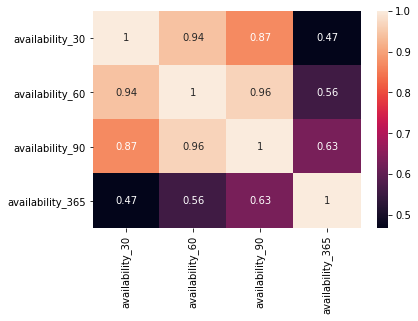

In [30]:
sns.heatmap(availabilities.corr(), annot=True)

Berdasarkan histogram, plot korelasi, dan kasus ketika ketersediaan kecil secara umum (menyebabkan banyak duplikasi), saya memutuskan untuk hanya menyimpan kolom ** availability_365 ** karena berisi informasi tentang kemungkinan pemesanan selama periode waktu terbesar.

In [31]:
df.drop([ 'availability_30', 'availability_60',
       'availability_90'],axis=1,inplace=True)

### Target variable exploration

In [32]:
df['price']

0       $250.00
1        $65.00
2        $65.00
3        $75.00
4        $79.00
         ...   
3580     $69.00
3581    $150.00
3582    $198.00
3583     $65.00
3584     $65.00
Name: price, Length: 3585, dtype: object

In [33]:
df['price'].unique()

array(['$250.00', '$65.00', '$75.00', '$79.00', '$100.00', '$58.00',
       '$229.00', '$60.00', '$57.00', '$93.00', '$150.00', '$145.00',
       '$165.00', '$49.00', '$40.00', '$120.00', '$70.00', '$175.00',
       '$95.00', '$90.00', '$67.00', '$55.00', '$200.00', '$110.00',
       '$115.00', '$125.00', '$78.00', '$50.00', '$45.00', '$85.00',
       '$89.00', '$285.00', '$140.00', '$80.00', '$63.00', '$46.00',
       '$62.00', '$69.00', '$73.00', '$61.00', '$27.00', '$190.00',
       '$149.00', '$168.00', '$205.00', '$117.00', '$429.00', '$267.00',
       '$87.00', '$300.00', '$119.00', '$195.00', '$210.00', '$500.00',
       '$130.00', '$450.00', '$399.00', '$350.00', '$99.00', '$295.00',
       '$107.00', '$76.00', '$59.00', '$88.00', '$164.00', '$185.00',
       '$105.00', '$319.00', '$53.00', '$199.00', '$114.00', '$180.00',
       '$92.00', '$84.00', '$275.00', '$230.00', '$192.00', '$170.00',
       '$240.00', '$225.00', '$178.00', '$109.00', '$383.00', '$184.00',
       '$299.

In [34]:
df['price'] = df['price'].str.replace("$","").str.replace(",","").astype(float)

In [35]:
df[df['price'] == 0]

,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,instant_bookable,bedrooms,bed_type,beds,price,cleaning_fee,availability_365,guests_included,extra_people,minimum_nights,cancellation_policy,high_end_electronics,smoke_detector,washing_machine,heating,hair_dryer,hangers,tv,kitchen,workspace,internet


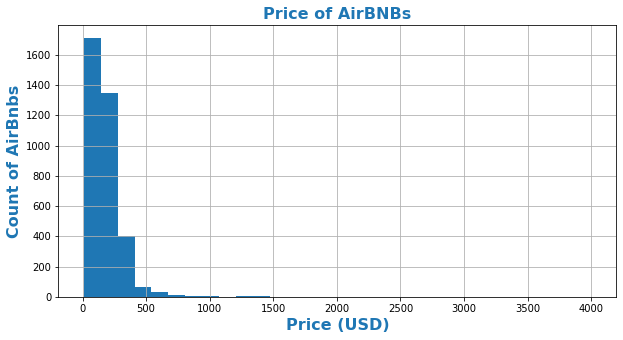

In [36]:
plt.figure(figsize=(10, 5));
df['price'].hist(bins = 30);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

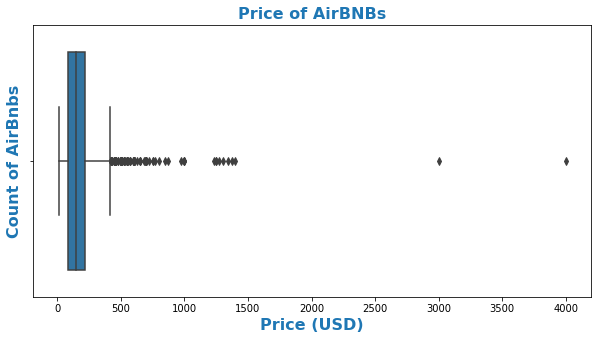

In [37]:
plt.figure(figsize=(10, 5));
sns.boxplot(df['price']);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

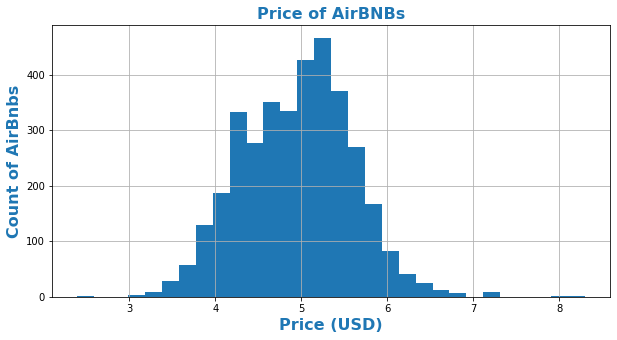

In [38]:
df['log_price'] = np.log1p(df['price'])
plt.figure(figsize=(10, 5));
df['log_price'].hist(bins = 30);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

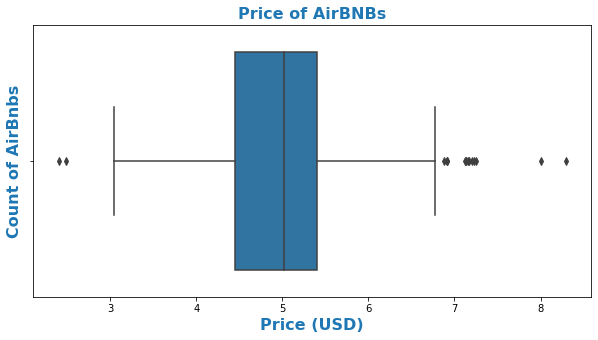

In [40]:
plt.figure(figsize=(10, 5));
sns.boxplot(df['log_price']);
plt.title('Price of AirBNBs', size = 16, weight = 'bold', color='C0');
plt.ylabel('Count of AirBnbs', weight = 'bold', size = 16, color='C0');
plt.xlabel('Price (USD)', weight = 'bold', size= 16, color='C0');

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3585 entries, 0 to 3584
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3585 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3585 non-null   object 
 3   accommodates            3585 non-null   int64  
 4   bathrooms               3585 non-null   float64
 5   instant_bookable        3585 non-null   object 
 6   bedrooms                3585 non-null   float64
 7   bed_type                3585 non-null   object 
 8   beds                    3585 non-null   float64
 9   price                   3585 non-null   float64
 10  cleaning_fee            3585 non-null   float64
 11  availability_365        3585 non-null   int64  
 12  guests_included         3585 non-null   int64  
 13  extra_people            3585 non-null   float64
 14  minimum_nights          3585 non-null   

karena sulit untuk mengganti nan pada 'property_type'maka nan nya saya drop

In [42]:
df.dropna(axis=0,inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3582 entries, 0 to 3584
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood_cleansed  3582 non-null   object 
 1   property_type           3582 non-null   object 
 2   room_type               3582 non-null   object 
 3   accommodates            3582 non-null   int64  
 4   bathrooms               3582 non-null   float64
 5   instant_bookable        3582 non-null   object 
 6   bedrooms                3582 non-null   float64
 7   bed_type                3582 non-null   object 
 8   beds                    3582 non-null   float64
 9   price                   3582 non-null   float64
 10  cleaning_fee            3582 non-null   float64
 11  availability_365        3582 non-null   int64  
 12  guests_included         3582 non-null   int64  
 13  extra_people            3582 non-null   float64
 14  minimum_nights          3582 non-null   

In [44]:
df.to_csv('listings_cleaned.csv', index=False)